In [1]:
from LSTM import *
from data_getter import *
import matplotlib.pyplot as plt
from IPython import display
import pickle

In [2]:
directory = 'D:/archive/tensors/'

In [3]:
tensor = get_tensor(directory)

100%|██████████████████████████████████████████████████████████████████████████████| 1910/1910 [00:33<00:00, 56.74it/s]


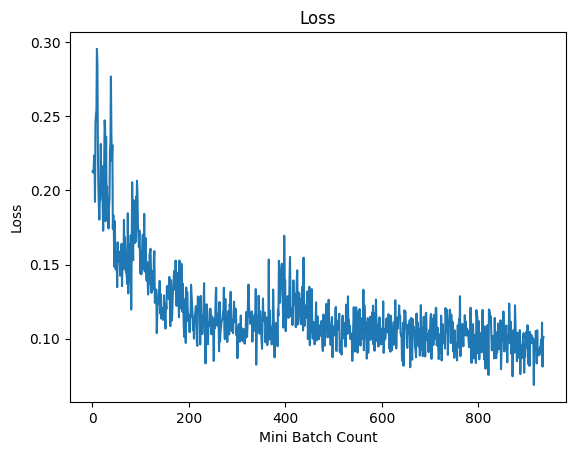

In [4]:
#training
model = LSTM(tensor,3,5,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.7)
x = []
batch_number = 0
y = []
model_name = 'model '+str(datetime.datetime.now())[:-7].replace(':','')+'.pkl'
for n in tqdm(range(model.training_users.shape[0]//20)):
    mini_batch = model.get_mini_batch('train')
    batch_number += 1
    losses = []
    for n in range(1,model.days):
        data = mini_batch[mini_batch[:,1]==n]
        if data.shape[0]>0:
            output = model(data)
            ground = data[:,6]
            loss = model.loss(ground,output)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            losses.append(loss.item())
            model.h.detach_()
            model.C.detach_()
    x.append(batch_number)
    y.append(sum(losses)/len(losses))
    display.clear_output()
    plt.title('Loss')
    plt.xlabel('Mini Batch Count')
    plt.ylabel('Loss')
    plt.plot(x,y)
    plt.show()
    file = open(model_name,'wb+')
    pickle.dump(model,file)
display.clear_output()
plt.title('Loss')
plt.xlabel('Mini Batch Count')
plt.ylabel('Loss')
plt.plot(x,y)
plt.show()

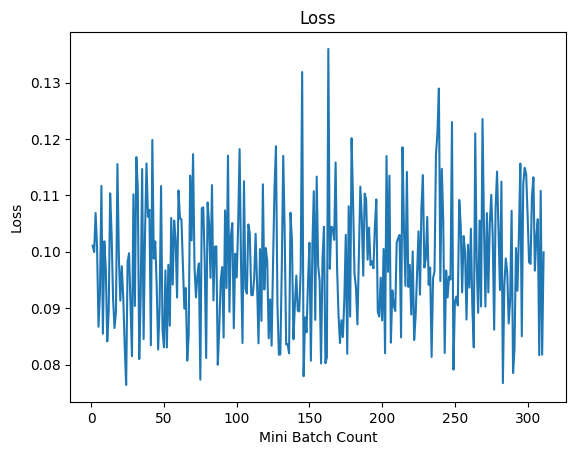

In [7]:
#test
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.7)
x = []
batch_number = 0
y = []
for n in tqdm(range(model.test_users.shape[0]//20)):
    mini_batch = model.get_mini_batch('test')
    batch_number += 1
    losses = []
    for n in range(1,model.days):
        data = mini_batch[mini_batch[:,1]==n]
        if data.shape[0]>0:
            output = model(data)
            ground = data[:,6]
            loss = model.loss(ground,output)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            losses.append(loss.item())
            model.h.detach_()
            model.C.detach_()
    x.append(batch_number)
    y.append(sum(losses)/len(losses))
    display.clear_output()
    plt.title('Loss')
    plt.xlabel('Mini Batch Count')
    plt.ylabel('Loss')
    plt.plot(x,y)
    plt.show()
display.clear_output()
plt.title('Loss')
plt.xlabel('Mini Batch Count')
plt.ylabel('Loss')
plt.plot(x,y)
plt.show()